In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# 커널 서포트 벡터 머신

In [2]:
# SVM은 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것
# 분류와 회귀에 모두 사용할 수 있음
    # 여기선 분류 문제 사용하겠음, 회귀의 경우도 개념은 같음

# 직선과 초평면은 유연하지 못하여, 저차원 데이터셋에선 선형 모델이 매우 제한적임
# 선형 모델을 유연하게 만드는 한가지 방법은 특성끼리, 곱하거나, 특성을 거듭제곱 하는 식으로 새로운 특성을 추가하는 것

In [3]:
from sklearn.datasets import make_blobs

Text(0, 0.5, '특성 1')

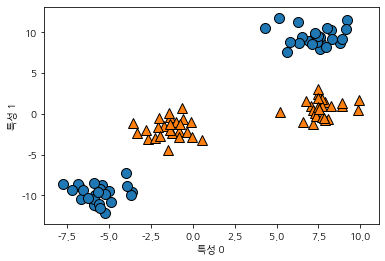

In [17]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2 # 0 or 1 특성 분류

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

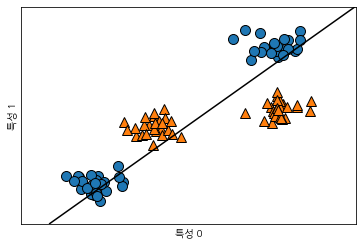

In [21]:
# 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있기때문에, 이런 데이터셋에는 잘 적중하지 않음
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0.5, 0, '특성 1 ** 2')

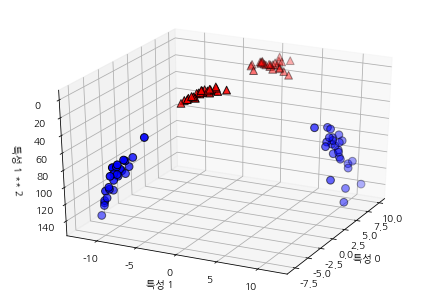

In [43]:
# 두번째 특성을 제곱한 새로운 특성을 추가해 입력 특성을 확장해보겠음
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:,1:]**2])
    # X[:,1:].shape > (100, 1), X[:,1].shape > (100,)
    # 두 배열을 왼쪽에서 오른쪽으로 붙이기, X배열에 X의 두번째 특성값을 제곱한 배열을 새롭게 붙인다. 총 세개의 특성을 가지게됨
    # np.r_[a, b]
    # np.hstack([a, b])
    # np.concatenate((a, b), axis = 0) 셋의 코드는 같은 기능을 한다
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev= -152, azim= -26)
# y == 0 인 포인트를 먼저 그리고, y == 1 인 포인트를 그리겠음
mask = y == 0 # y값이 0이면 True, 1이면 False boolean 값
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],color='blue',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')
    # mask, y==0, s매개변수 -> 도형 크기, cmap 매개변수 -> 컬러 스타일

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],color='red', marker = '^', 
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')
    # ~mask < 반전값 y==1
ax.set_xlabel('특성 0')
ax.set_ylabel('특성 1')
ax.set_zlabel('특성 1 ** 2')

Text(0.5, 0, '특성 1 ** 2')

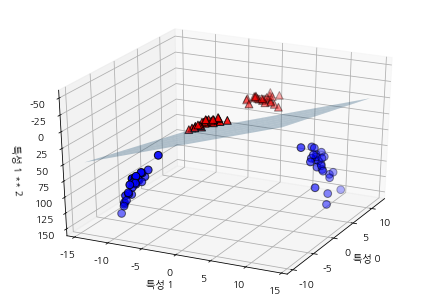

In [56]:
# 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분할 수 있음
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_ # ravel() 1차원 배열로 평평하게
# 결정경계 그리기
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev= -152, azim= -26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
    # 시작점과 끝점을 균일 간격으로 나눈 점들을 생성해주는 linspace()함수
    # 그래프를 더 폭넓게 그리기 위해, 최저값에서 -2, 최대값에서 +2 만큼 더 그림 범위 지정
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
    # meshgrid numpy의 meshgrid 명령을 통해 행단위와 열단위로 각각 해당 배열을 정방(square) 행렬로 선언
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha =.3)
# 경계면
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],color='blue',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],color='red', marker = '^', 
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel('특성 0')
ax.set_ylabel('특성 1')
ax.set_zlabel('특성 1 ** 2')


Text(0, 0.5, '특성 1')

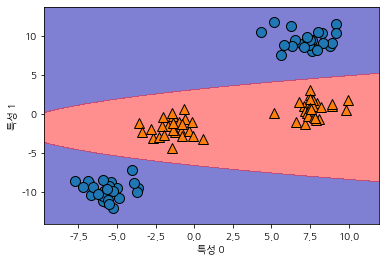

In [66]:
# 원래 특성으로 투영하면, 선형 SVM 모델은 더 이상 선형이 아닌, 타원에 가까워진 모습을 가짐
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
# contourf(Z)는 행렬 Z의 등치선을 포함하는 채워진 등고선 플롯을 만듬
# 여기서 Z는 x-y 평면의 높이 값을 포함, MATLAB®은 표시할 등고선을 자동으로 선택. Z의 열과 행 인덱스는 각각 평면의 x, y 좌표(XX, YY 로 지정)
# contourf(___,levels)는 위에 열거된 구문에서 표시할 등고선을 마지막 인수로 지정
# levels를 스칼라 값 n으로 지정하면 n개의 자동으로 선택된 레벨(높이)에 등고선이 표시
# 특정 높이에 등고선을 그리려면 levels를 단조 증가하는 값으로 구성된 벡터로 지정
# 하나의 높이(k)에 등고선을 그리려면 levels를 요소를 2개 가진 행 벡터 [k k]로 지정
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 커널 기법